### Import Libraries


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
%matplotlib inline
sns.set_style('white')

#### Read Data


In [34]:
airbnb= pd.read_csv('/home/aman/Documents/EDA-s/New-York-City-Airbnb-Open-Data/data/AB_NYC_2019.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Shape of the dataset


In [35]:
print(f"The shape of the dataset is {airbnb.shape}")

The shape of the dataset is (48895, 16)


#### Check the datatypes of the dataset


In [36]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### Cleaning, Wrangling and Understanding the Data


In [37]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Drop unnecessary columns

- id
- host_name
- last_review


In [38]:
airbnb.drop(['id','host_name','last_review'],axis=1,inplace=True)

#### we can observe there are lot of null values in column 'reviews_per_month' ==10052

- we replace all the null values in column 'reviews_per_month' with 0
-


In [39]:
airbnb['reviews_per_month'].fillna(0,inplace=True)

#### Look into Categorical values

- neighbourhood_group
- neighbourhood
- room_type


In [40]:
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [41]:
print(f"Number of unique neighbourhood places are {len(airbnb['neighbourhood'].unique())}")

Number of unique neighbourhood places are 221


In [42]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

### Visualization and explore the Data


In [43]:
### Lets look into host ID's 
top_host= airbnb['host_id'].value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

#### Convert the top_host (series) into a DataFrame


In [44]:
top_host_df= pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_Id','host_id':'Count'},inplace=True)
top_host_df

,Host_Id,Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


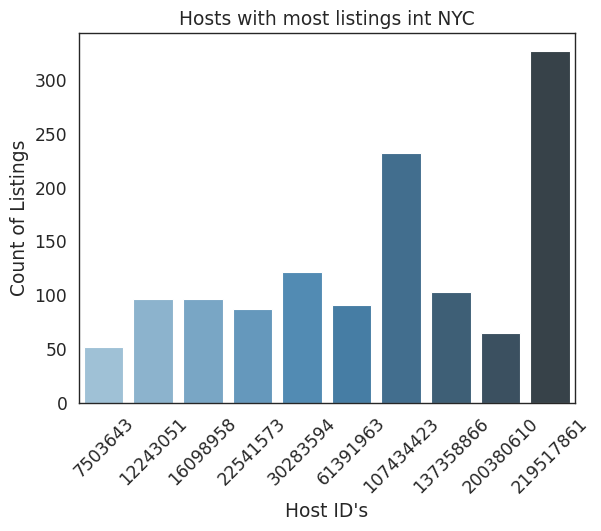

In [45]:
plot_1= sns.barplot(x='Host_Id',y='Count',data=top_host_df, palette='Blues_d')
plot_1.set_title("Hosts with most listings int NYC")
plot_1.set_ylabel("Count of Listings")
plot_1.set_xlabel("Host ID's")
plot_1.set_xticklabels(plot_1.get_xticklabels(),rotation=45)
plt.show()

In [46]:
A1= airbnb.loc[airbnb['neighbourhood_group']=='Brooklyn']
price_A1= A1[['price']]
A2= airbnb.loc[airbnb['neighbourhood_group']=='Manhattan']
price_A2= A2[['price']]
A3= airbnb.loc[airbnb['neighbourhood_group']=='Queens']
price_A3=A3[['price']]
A4= airbnb.loc[airbnb['neighbourhood_group']=='Staten Island']
price_A1= A4[['price']]
A5= airbnb.loc[airbnb['neighbourhood_group']=='Bronx']
price_A5= A5[['price']]

In [47]:
# Put all the prices in one List
price_list= [A1,A2,A3,A4,A5]

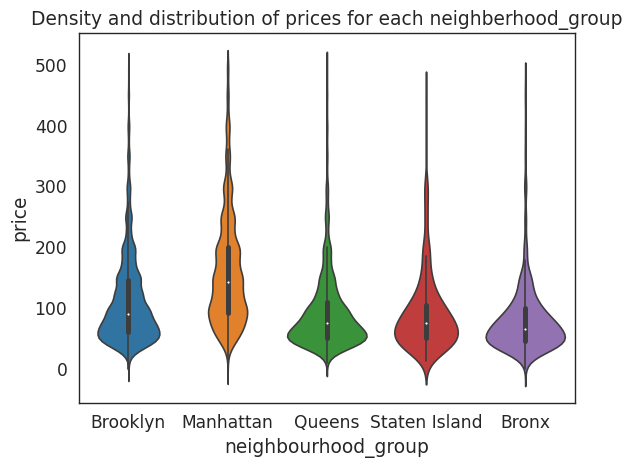

In [48]:
A6= airbnb[airbnb.price<500]
viz= sns.violinplot(data=A6,x='neighbourhood_group',y='price')
viz.set_title('Density and distribution of prices for each neighberhood_group')
plt.show()

* From the above diagram we can notice 
* Manhattan has the highest range of prices for listing with $150 price as average observation
* Next is Brooklyn
* Queens and Stasen Island appear to have similar Distributions.
* Bronx has the cheapest per night

## Price vs Room Type

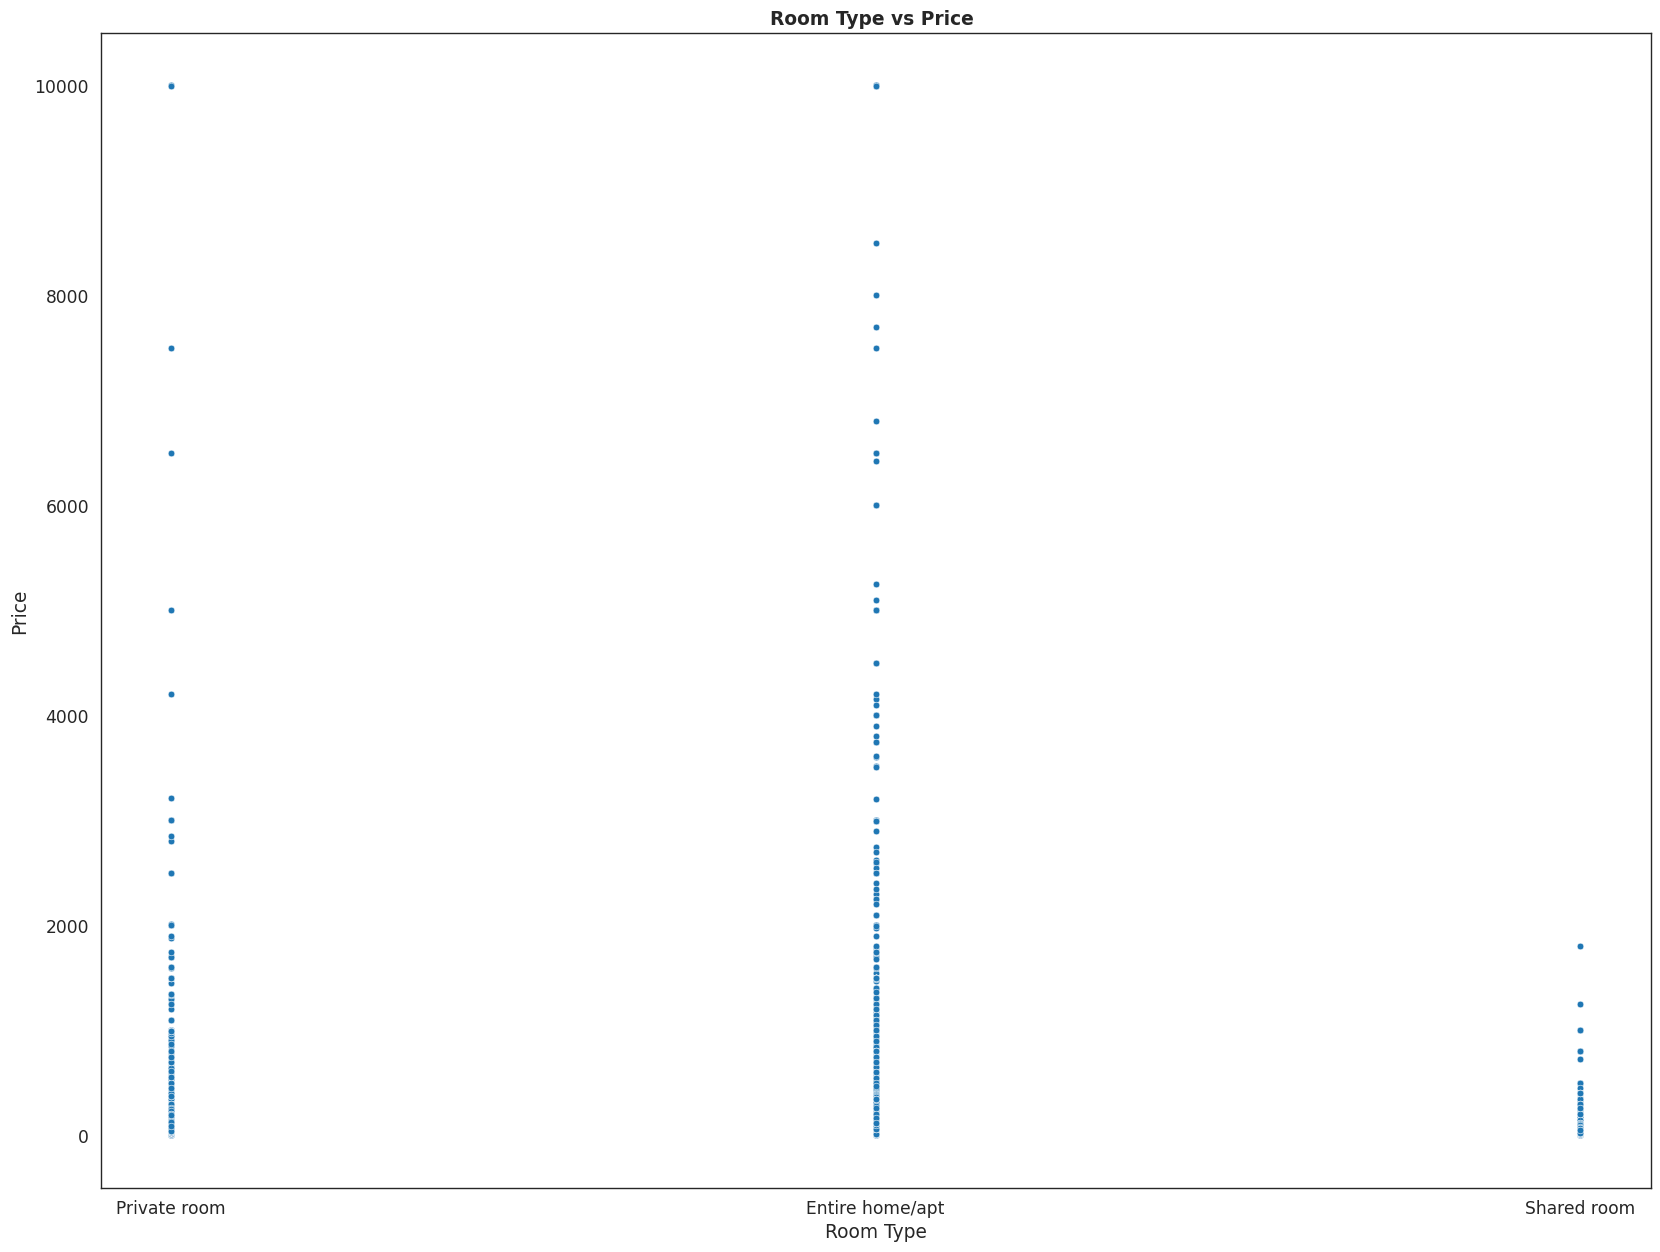

In [49]:
plt.figure(figsize=(20,15))
sns.scatterplot(x='room_type',y='price',data=airbnb)
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.title("Room Type vs Price ",weight='bold')
plt.show()

* From the graph we can notice that the price in Private and Entire romm havethe highest prices
* The shared room price is always lower than $200

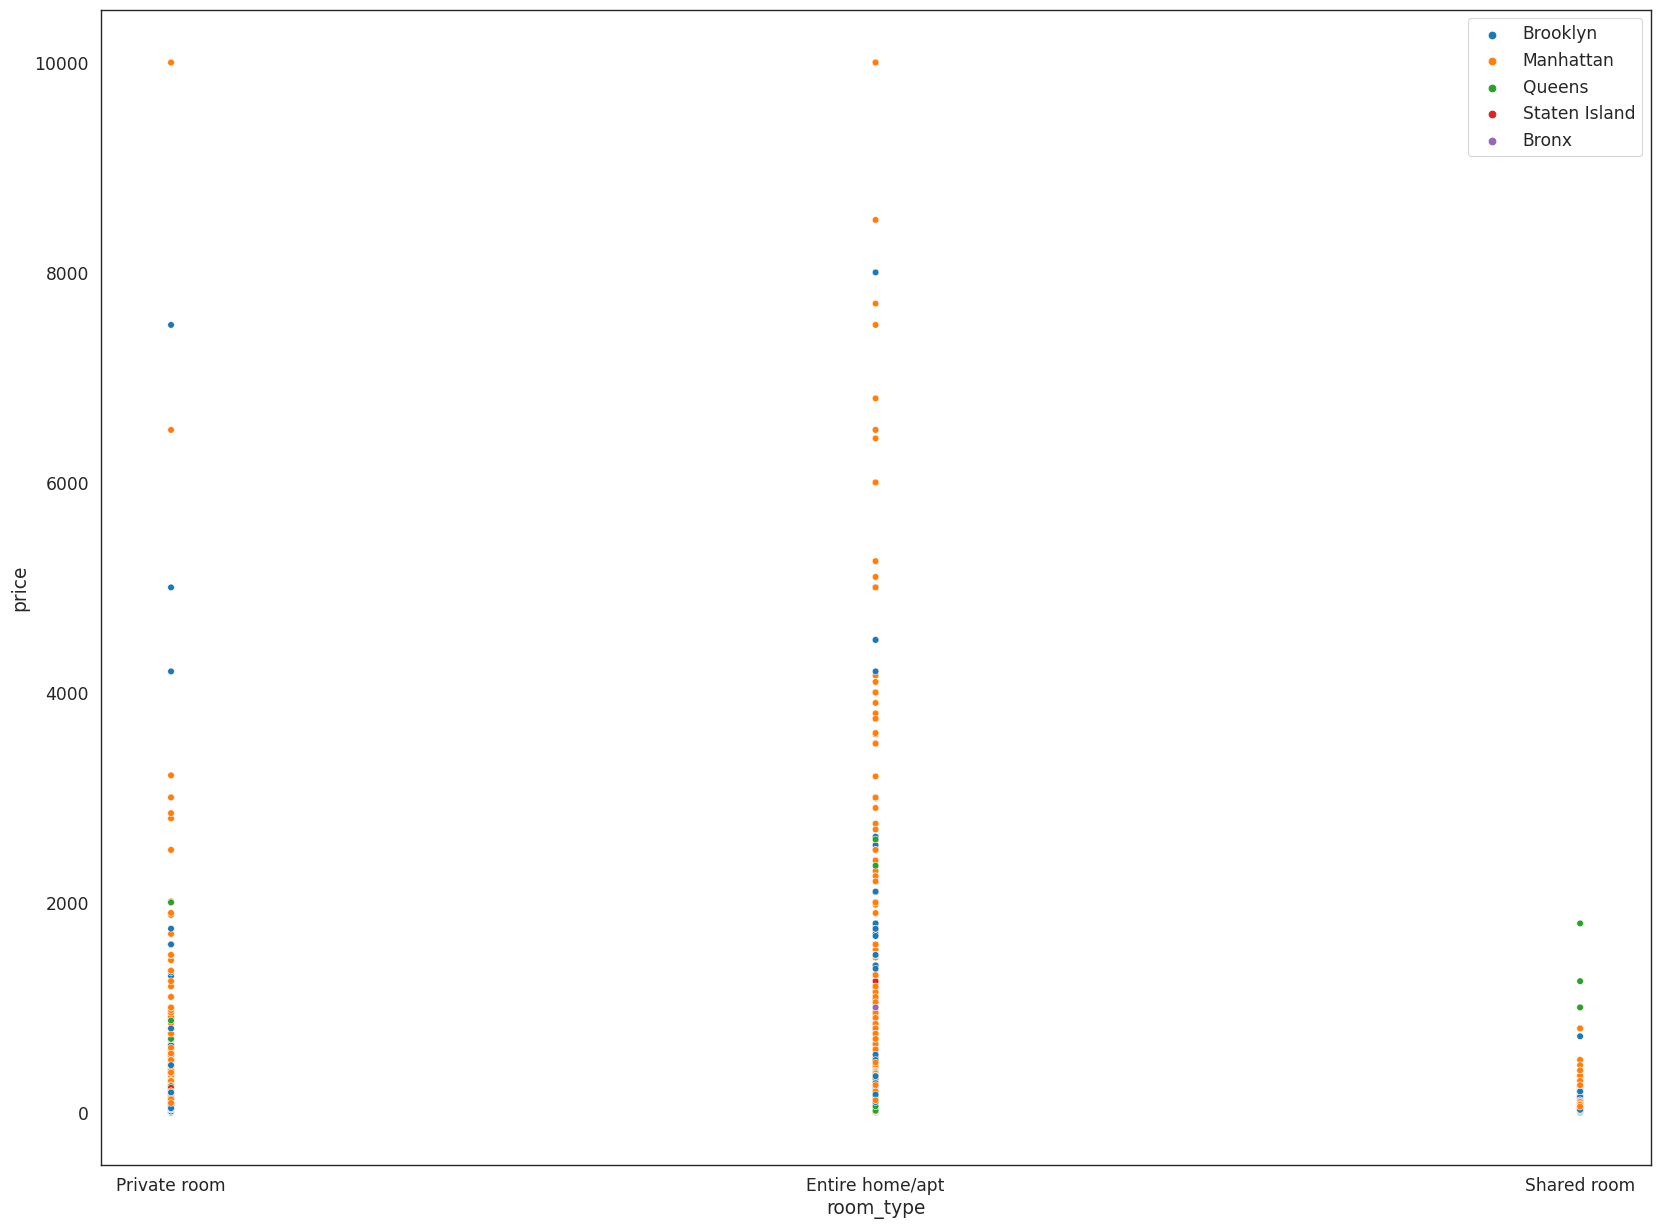

In [50]:
plt.figure(figsize=(20,15))
sns.scatterplot(x='room_type',y='price',hue='neighbourhood_group',data=airbnb)
plt.legend(loc=1)
plt.show(

)

* The highest price of Private Room and Entire Home/Apt is in the same area which is Manhattan.
*  And also brooklyn has very-high prices in Private Room and Entire Home/Apt
*  Shared room's Highest price is in the Queens area

## Deal with the Categorical Variables with the help of cat.codes


In [51]:
airbnb['neighbourhood_group']= airbnb['neighbourhood_group'].astype("category").cat.codes
airbnb['neighbourhood']= airbnb['neighbourhood'].astype("category").cat.codes
airbnb['room_type']= airbnb['room_type'].astype("category").cat.codes


### Correlation

<AxesSubplot:>

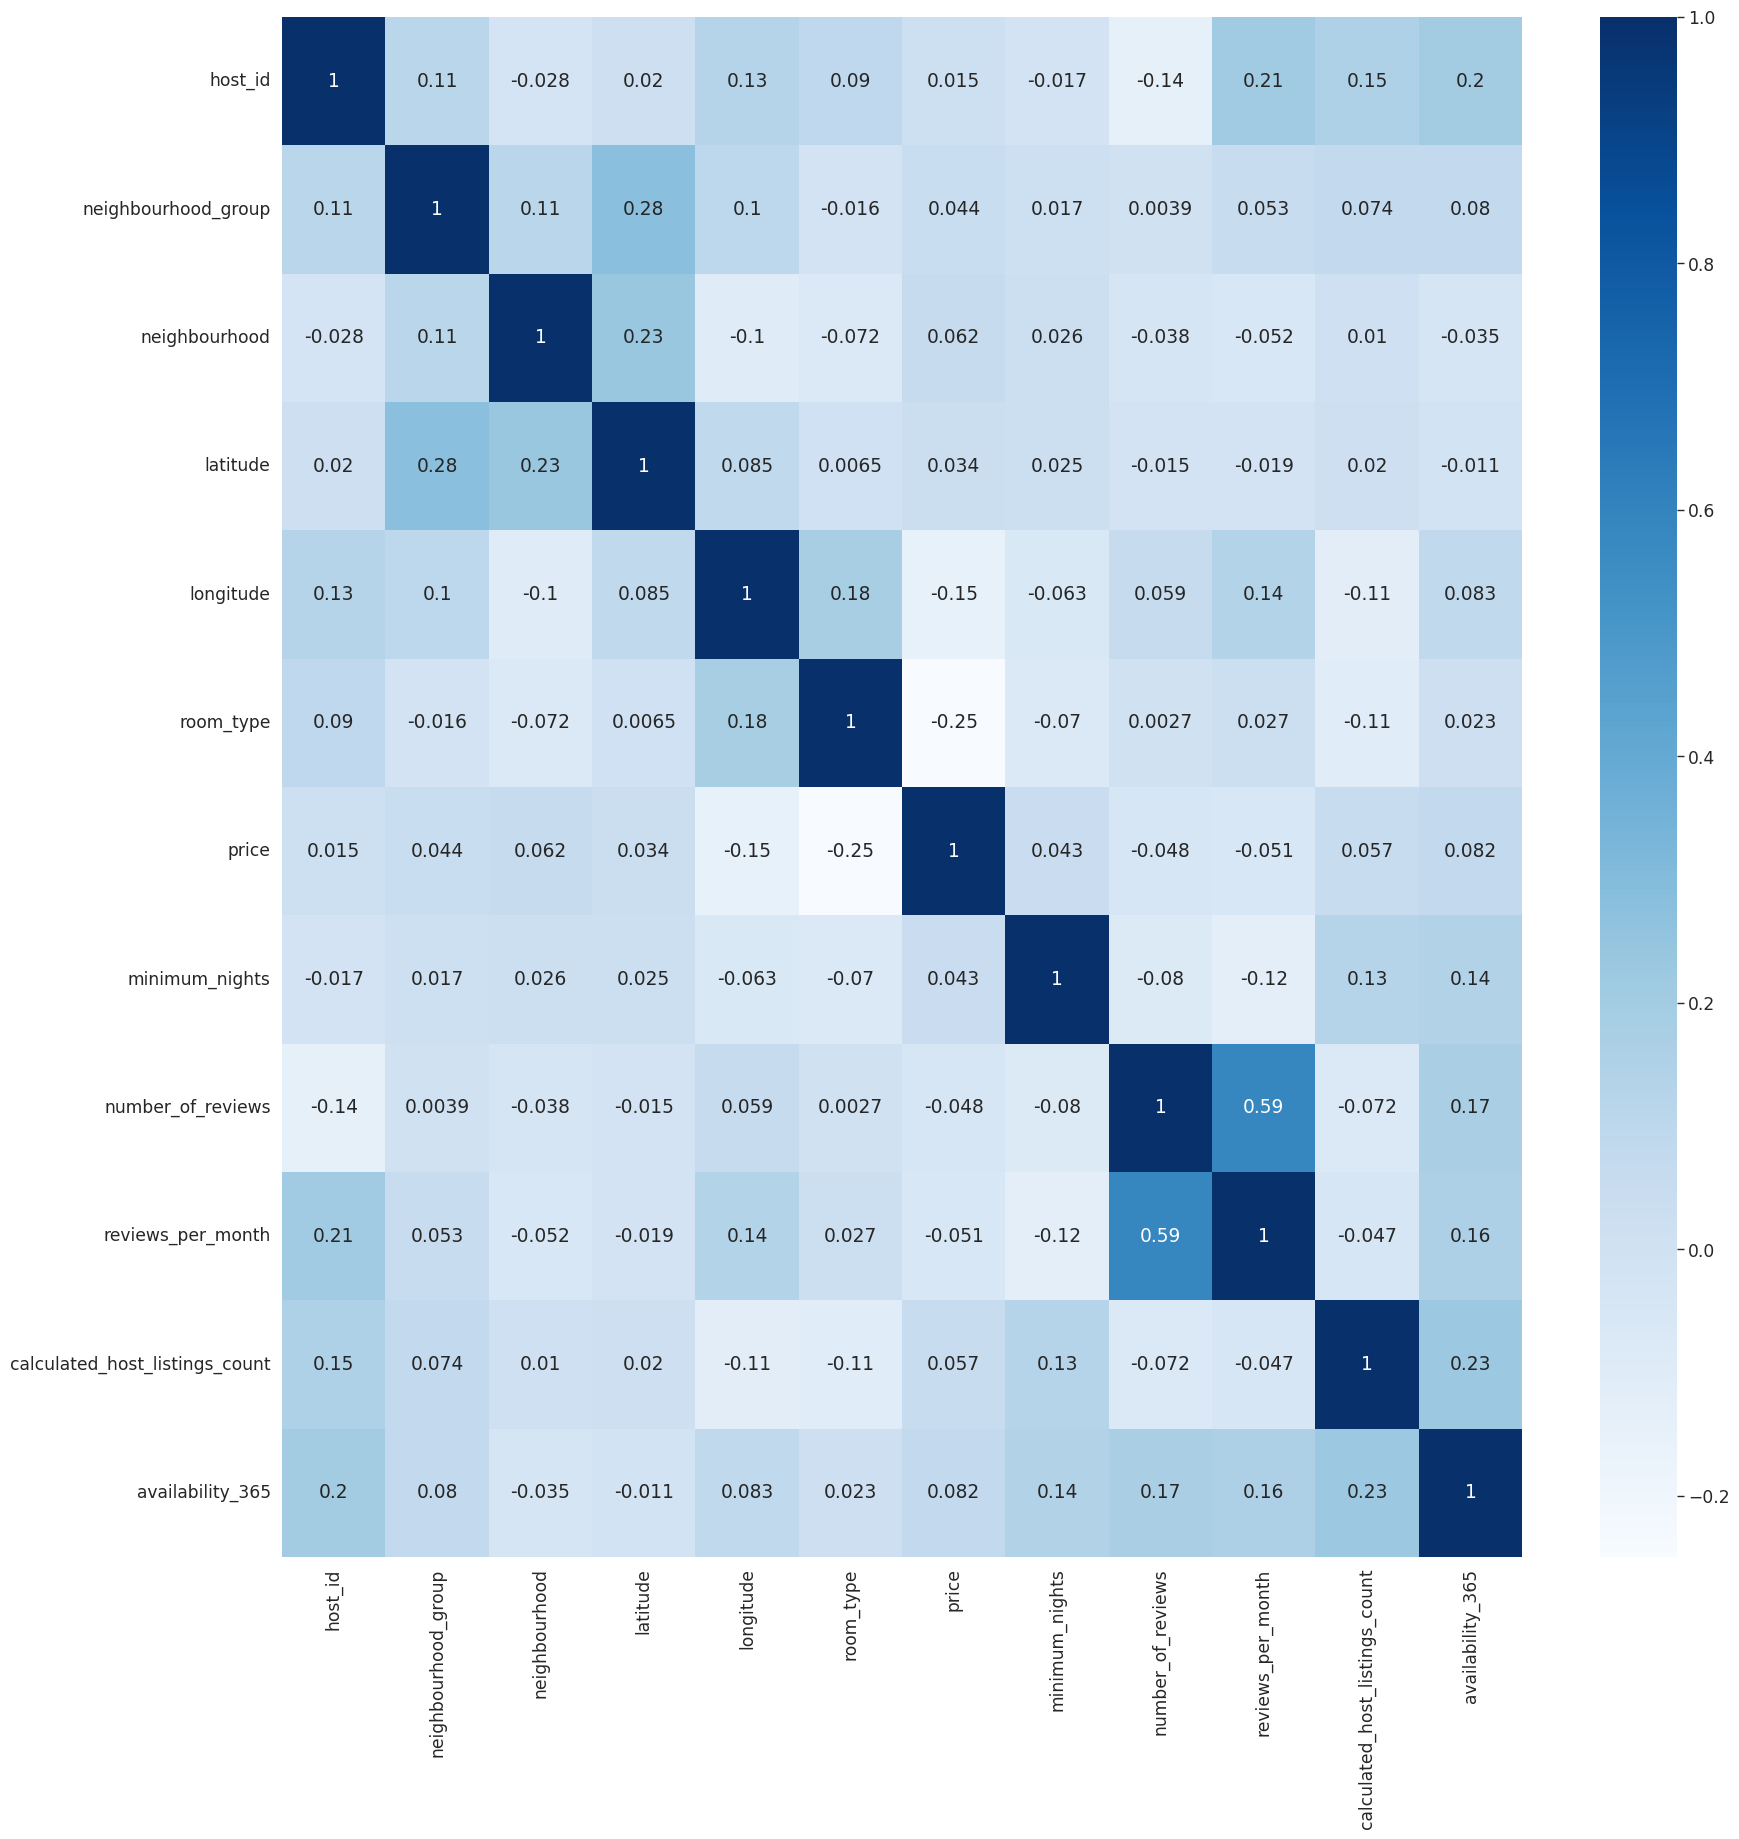

In [52]:
plt.figure(figsize=(20,20))
sns.set_context('paper',font_scale=1.4)

crash_mx= airbnb.corr()
sns.heatmap(crash_mx,annot=True,cmap='Blues')

* There is no string correlation between price and other features.
* This means there is no need to drop any other rows from the dataset

In [53]:
airbnb.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [54]:
airbnb.head(n=3)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,1,108,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,2,127,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,2,94,40.80902,-73.94190,1,150,3,0,0.00,1,365


In [55]:

airbnb.head()


,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,1,108,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,2,127,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,2,94,40.80902,-73.94190,1,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,1,41,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,2,61,40.79851,-73.94399,0,80,10,9,0.10,1,0
